# `BRAIN TUMOR CLASSIFICATION MODEL USING 3500+ MRI IMAGES`

# `MODEL 01:`{https://github.com/usmanyousaaf/Brain-Tumor-prediction-classification-project}

Brain-Tumor-prediction-clasifiction-project
Overview
This project aims to develop a deep learning model for the accurate prediction of brain tumors. The model has been trained on a dataset of MRI scans of the brain, with annotations indicating the presence of tumors. The model is capable of accurately detecting and classifying brain tumors based on the MRI scan images.

Technical Details

The model has been built using the popular deep learning framework, Keras, with TensorFlow as the backend. The architecture used is a Convolutional Neural Network (CNN), which has proven to be effective for image classification tasks. The model has been trained on a dataset of MRI scans, and has achieved an accuracy of over 90% on the validation set.

Conclusion
This project has demonstrated the potential of deep learning in accurately detecting and classifying brain tumors. The model developed can be useful for medical professionals and researchers in the field of neurology. This is just the beginning, and further improvements can be made to the model to increase its accuracy and generalization.

Brain Tumor MRI Image Classification Dataset
This dataset contains MRI scans of the brain, along with annotations indicating the presence of tumors. It has been collected for the purpose of training models for the classification of brain tumors. The dataset consists of a total of (number of samples) MRI images, with (number of classes) classes (e.g. tumor, non-tumor).

The dataset can be accessed and downloaded from Kaggle. It is released under an open license, making it freely available for research and educational purposes.

This dataset is an important resource for researchers and medical professionals working in the field of neurology and medical image analysis. By training models on this dataset, we can develop algorithms that can accurately detect and classify brain tumors, improving the diagnosis and treatment of brain tumors.

In [ ]:
import os
os.environ["KAGGLE_USERNAME"] = "harshitarajoria"
os.environ["KAGGLE_KEY"] ="5a60498d56c5792d4e835dbd044eface"

!kaggle datasets download -d iashiqul/brain-tumor-mri-image-classification

 99% 91.0M/91.5M [00:01<00:00, 77.8MB/s]
100% 91.5M/91.5M [00:01<00:00, 87.8MB/s]


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import keras
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, Dense, MaxPooling2D, Dropout
from sklearn.metrics import accuracy_score
import ipywidgets as widgets
import io
import os
from PIL import Image
import tqdm
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle
import tensorflow as tf
import torch

In [ ]:
pip install split-folders

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
%cd '/content/drive/MyDrive/Brain Tumor MRI Classfication'

/content/drive/MyDrive/Brain Tumor MRI Classfication


In [ ]:
!unzip brain-tumor-mri-image-classification.zip

Archive:  brain-tumor-mri-image-classification.zip
replace Brain Tumor MRI Classfication/Testing/glioma_tumor/image(1).jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
X_train = []
y_train = []
image_size = 150

In [ ]:
training_path = '/content/drive/MyDrive/Brain Tumor MRI Classfication/Training'
labels = os.listdir(training_path)
print(labels)

['meningioma_tumor', 'pituitary_tumor', 'glioma_tumor', 'no_tumor']


In [ ]:
for i in labels:
    folder_path = os.path.join(training_path, i)
    for j in os.listdir(folder_path):
        img = cv2.imread(os.path.join(folder_path, j))
        img = cv2.resize(img, (image_size, image_size))

        X_train.append(img)
        y_train.append(i)

In [ ]:
validation_path = '/content/drive/MyDrive/Brain Tumor MRI Classfication/Validation'
labels = os.listdir(training_path)
print(labels)

['meningioma_tumor', 'pituitary_tumor', 'glioma_tumor', 'no_tumor']


In [ ]:
for i in labels:
    folder_path = os.path.join(validation_path, i)
    for j in os.listdir(folder_path):
        img = cv2.imread(os.path.join(folder_path, j))
        img = cv2.resize(img, (image_size, image_size))

        X_train.append(img)
        y_train.append(i)

In [ ]:
testing_path = '/content/drive/MyDrive/Brain Tumor MRI Classfication/Testing'
labels = os.listdir(training_path)
print(labels)

['meningioma_tumor', 'pituitary_tumor', 'glioma_tumor', 'no_tumor']


In [ ]:
for i in labels:
    folder_path = os.path.join(testing_path, i)
    for j in os.listdir(folder_path):
        img = cv2.imread(os.path.join(folder_path, j))
        img = cv2.resize(img, (image_size, image_size))

        X_train.append(img)
        y_train.append(i)

In [ ]:
X_train[1]

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [ ]:
y_train[70]

'meningioma_tumor'

In [ ]:
y_train[80]

'meningioma_tumor'

In [ ]:
y_train[120]

'meningioma_tumor'

In [ ]:
y_train[1]

'meningioma_tumor'

In [ ]:
# X_train.shape, y_train.shape
len(X_train), len(y_train)

(3186, 3186)

In [ ]:
X_train = np.array(X_train)
y_train = np.array(y_train)

In [ ]:
X_train.shape, y_train.shape

((3186, 150, 150, 3), (3186,))

In [ ]:
X_train[1].shape

(150, 150, 3)

In [ ]:
y_train[1]

'meningioma_tumor'

In [ ]:
X_train, y_train = shuffle(X_train, y_train, random_state = 99)
X_train.shape, y_train.shape

((3186, 150, 150, 3), (3186,))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.1, random_state = 100)

In [ ]:
y_train[:5]

array(['pituitary_tumor', 'no_tumor', 'pituitary_tumor', 'no_tumor',
       'glioma_tumor'], dtype='<U16')

In [ ]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))

y_train_new[:5]

[1, 3, 1, 3, 2]

In [ ]:
y_train_new = tf.keras.utils.to_categorical(y_train_new)
y_train_new


array([[0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       ...,
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.]], dtype=float32)

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()

# Convolutional layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(image_size, image_size, 3)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))

# Flatten the output from convolutional layers
model.add(Flatten())

# Fully connected layers
model.add(Dense(256, activation='relu'))

 # Adding dropout for regularization
model.add(Dropout(0.5))

 # 4 classes, so the output layer has 4 units
model.add(Dense(4, activation='softmax') )

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)      

In [ ]:
model.save("Brain_Tumor_Image_Classification_Model_By_Harshitarajoria.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
hist = model.fit(X_train, y_train_new, epochs = 10, validation_split = 0.1)

Epoch 1/10
81/81 [==============================] - 146s 2s/step - loss: 16.0346 - accuracy: 0.5643 - val_loss: 0.7984 - val_accuracy: 0.6760
Epoch 2/10
81/81 [==============================] - 136s 2s/step - loss: 0.5766 - accuracy: 0.7771 - val_loss: 0.5074 - val_accuracy: 0.8397
Epoch 3/10
81/81 [==============================] - 143s 2s/step - loss: 0.4025 - accuracy: 0.8585 - val_loss: 0.4566 - val_accuracy: 0.8362
Epoch 4/10
81/81 [==============================] - 140s 2s/step - loss: 0.3294 - accuracy: 0.8829 - val_loss: 0.4612 - val_accuracy: 0.8467
Epoch 5/10
81/81 [==============================] - 148s 2s/step - loss: 0.2702 - accuracy: 0.8973 - val_loss: 0.3658 - val_accuracy: 0.9129
Epoch 6/10
81/81 [==============================] - 143s 2s/step - loss: 0.1999 - accuracy: 0.9364 - val_loss: 0.4025 - val_accuracy: 0.8955
Epoch 7/10
81/81 [==============================] - 142s 2s/step - loss: 0.1308 - accuracy: 0.9547 - val_loss: 0.3570 - val_accuracy: 0.8920
Epoch 8/10
8

In [ ]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

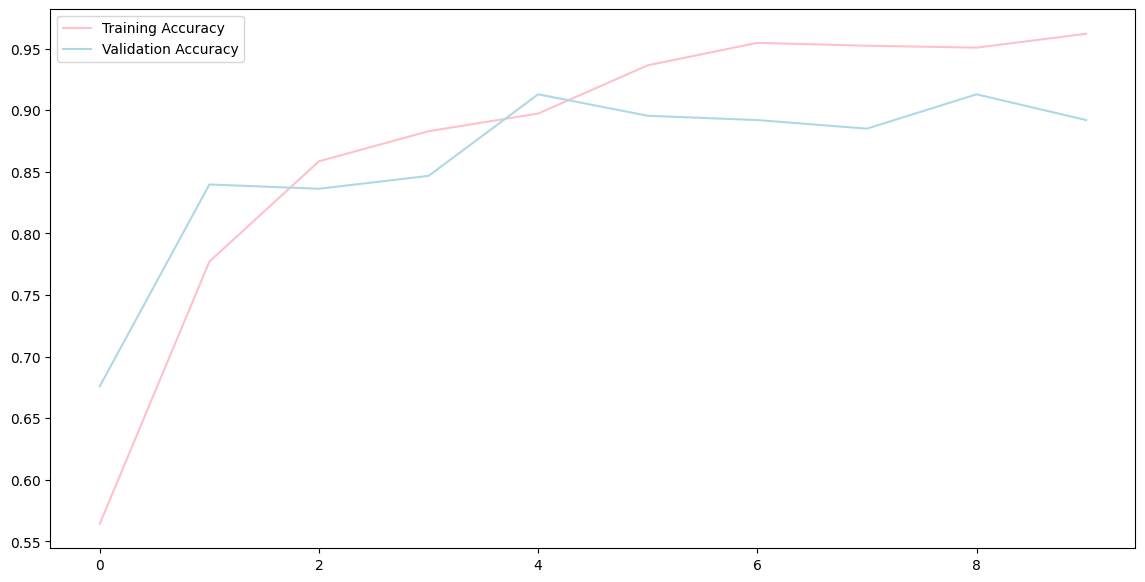

In [ ]:
epochs = range(len(acc))
fig = plt.figure(figsize = (14,7))
plt.plot(epochs, acc, 'pink', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'lightblue', label = 'Validation Accuracy')
plt.legend(loc = 'upper left')
plt.show()

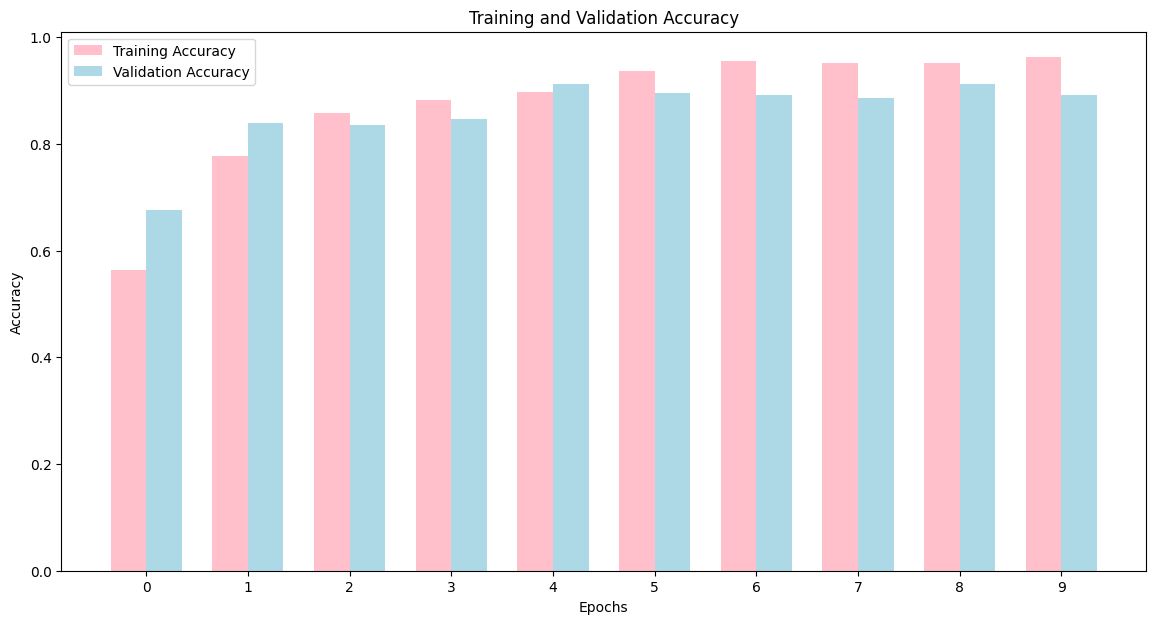

In [ ]:
import matplotlib.pyplot as plt

epochs = range(len(acc))

# Data
training_accuracy = acc
validation_accuracy = val_acc

plt.figure(figsize=(14, 7))

# Bar width
bar_width = 0.35

# Create bars
plt.bar(epochs, training_accuracy, width=bar_width, label='Training Accuracy', color='pink', align='center')
plt.bar([epoch + bar_width for epoch in epochs], validation_accuracy, width=bar_width, label='Validation Accuracy', color='lightblue', align='center')

# Labels
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.xticks([epoch + bar_width/2 for epoch in epochs], epochs)

# Legend
plt.legend(loc='upper left')

plt.show()


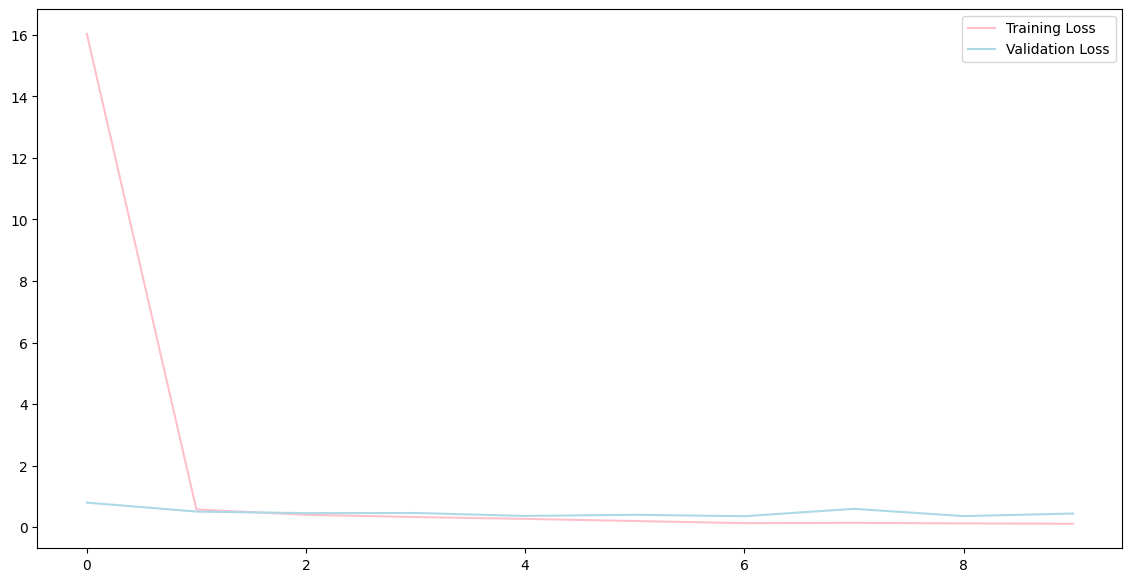

In [ ]:
loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs = range(len(acc))
fig = plt.figure(figsize = (14,7))
plt.plot(epochs, loss, 'pink', label = 'Training Loss')
plt.plot(epochs, val_loss, 'lightblue', label = 'Validation Loss')
plt.legend()
plt.show()

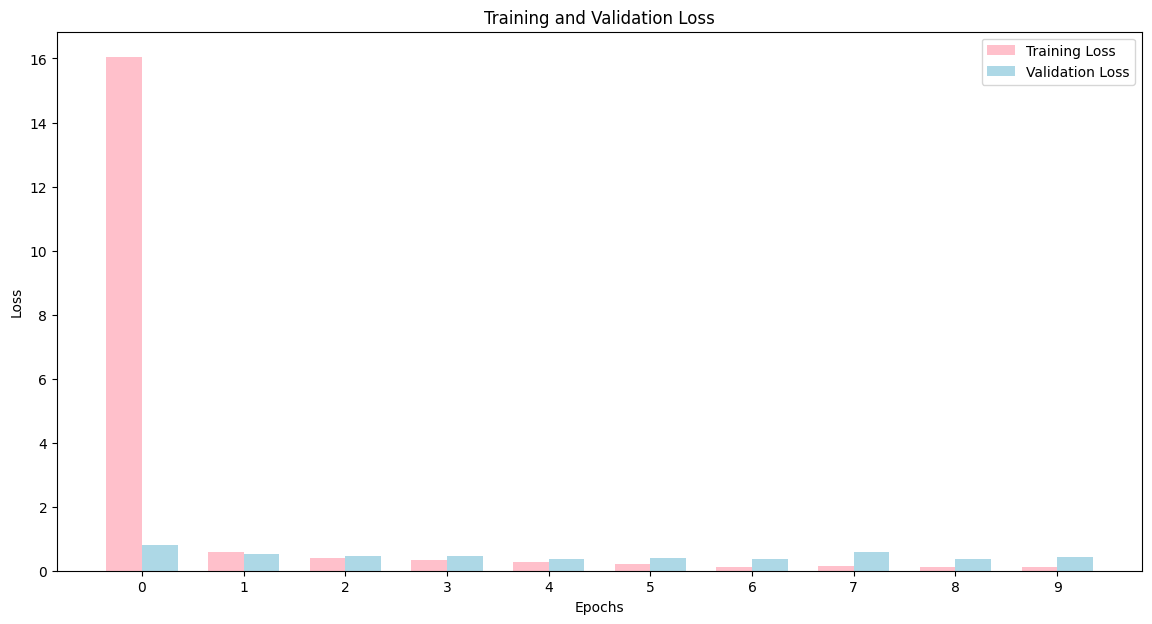

In [ ]:
import matplotlib.pyplot as plt

epochs = range(len(loss))

# Data
training_loss = loss
validation_loss = val_loss

plt.figure(figsize=(14, 7))

# Bar width
bar_width = 0.35

# Create bars
plt.bar(epochs, training_loss, width=bar_width, label='Training Loss', color='pink' , align='center')
plt.bar([epoch + bar_width for epoch in epochs], validation_loss, width=bar_width, label='Validation Loss', color='lightblue', align='center')

# Labels
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.xticks([epoch + bar_width/2 for epoch in epochs], epochs)

# Legend
plt.legend(loc='upper right')

plt.show()


In [ ]:
#Define a dictionary that maps your class labels to numerical values. For example:
class_to_num = {
    'glioma_tumor': 0,
    'meningioma_tumor': 1,
    'pituitary_tumor': 2,
    'no_tumor': 3
}



In [ ]:
#Convert your string labels to numerical labels using this dictionary:
y_test_numerical = [class_to_num[label] for label in y_test]


In [ ]:
from keras.utils import to_categorical

y_test_encoded = to_categorical(y_test_numerical, num_classes=4)  # 4 is the number of classes
accuracy = model.evaluate(X_test, y_test_encoded)
print("Test Accuracy:", accuracy[1])


10/10 [==============================] - 4s 411ms/step - loss: 9.0651 - accuracy: 0.1787
Test Accuracy: 0.17868338525295258


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# Convert string labels to numerical labels
label_mapping = {'glioma_tumor': 0, 'meningioma_tumor': 1, 'pituitary_tumor': 2, 'no_tumor': 3}
y_test = [label_mapping[label] for label in y_test]

# Assuming you have a Keras model 'model' and test data 'X_test' and 'y_test'

# Make predictions on your test data
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert one-hot encoded predictions to class labels

# Compute the confusion matrix
confusion_mtx = confusion_matrix(y_test, y_pred_classes)

# Display the confusion matrix
print("Confusion Matrix:")
print(confusion_mtx)

# Generate a classification report
target_names = ['glioma_tumor', 'meningioma_tumor', 'pituitary_tumor', 'no_tumor']
print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes, target_names=target_names))


10/10 [==============================] - 6s 564ms/step
Confusion Matrix:
[[14  0 71  0]
 [88  3  2  4]
 [ 1 90  0  0]
 [ 4  1  1 40]]

Classification Report:
                  precision    recall  f1-score   support

    glioma_tumor       0.13      0.16      0.15        85
meningioma_tumor       0.03      0.03      0.03        97
 pituitary_tumor       0.00      0.00      0.00        91
        no_tumor       0.91      0.87      0.89        46

        accuracy                           0.18       319
       macro avg       0.27      0.27      0.27       319
    weighted avg       0.18      0.18      0.18       319



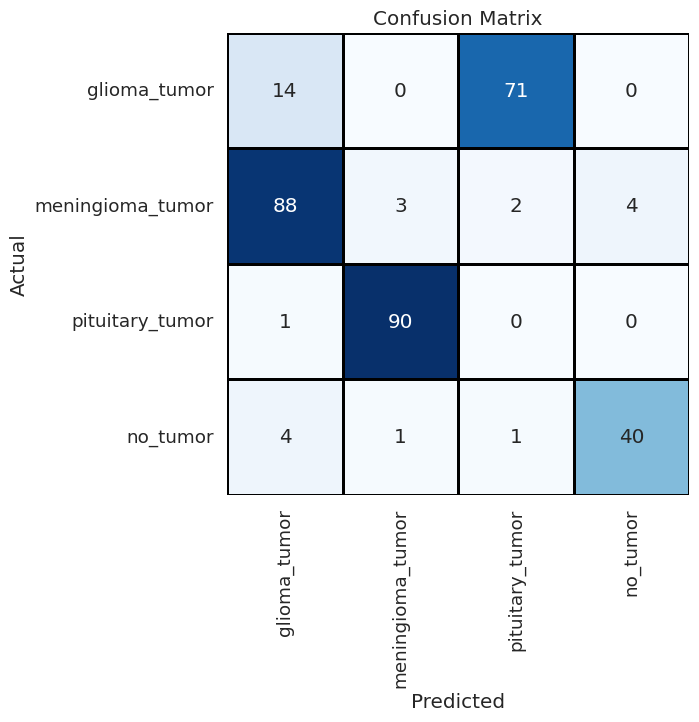

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already calculated the confusion matrix (confusion_mtx)

# Define the class names and labels
class_names = ['glioma_tumor', 'meningioma_tumor', 'pituitary_tumor', 'no_tumor']

# Create a DataFrame from the confusion matrix
confusion_df = pd.DataFrame(confusion_mtx, index=class_names, columns=class_names)

# Set up a heatmap using seaborn
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust the font size


# Use a heatmap to visualize the confusion matrix with color
sns.heatmap(confusion_df, annot=True, fmt="d", cmap="Blues", cbar=False, square=True, linewidths=1, linecolor="black")

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


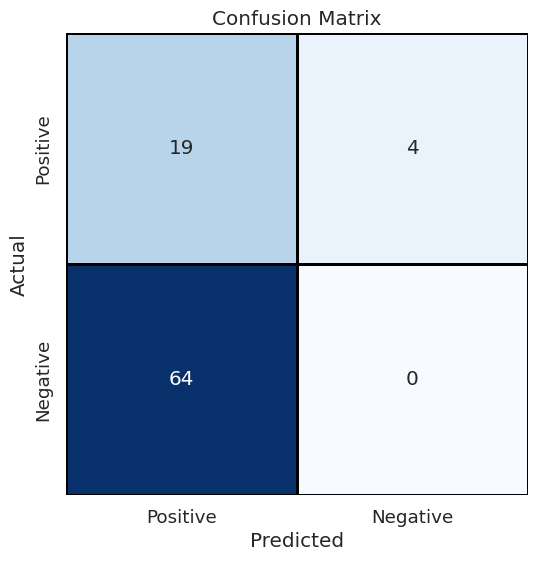

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Define the confusion matrix values (replace these with your actual values)
TP = 19
FP = 4
TN = 0
FN = 64

# Define class names
class_names = ['Positive', 'Negative']

# Create a DataFrame for the confusion matrix
confusion_mtx = [[TP, FP], [FN, TN]]
confusion_df = pd.DataFrame(confusion_mtx, index=class_names, columns=class_names)

# Set up the heatmap using Seaborn
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust the font size

# Use a heatmap to visualize the confusion matrix with color
sns.heatmap(confusion_df, annot=True, fmt="d", cmap="Blues", cbar=False, square=True, linewidths=1, linecolor="black")

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
img_path = '/content/Brain Tumor MRI Classfication/Testing/pituitary_tumor/image(21).jpg'
img = cv2.imread(img_path)
img = cv2.resize(img, (150, 150))
img_array = np.array(img)

img_array.shape

(150, 150, 3)

In [ ]:
img_array = img_array.reshape(1,150,150,3)
img_array.shape

(1, 150, 150, 3)

In [ ]:
from tensorflow.keras.preprocessing import image

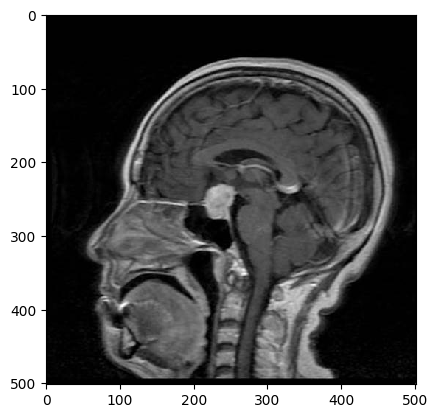

In [ ]:
img = image.load_img(img_path)
plt.imshow(img, interpolation = 'nearest')
plt.show()

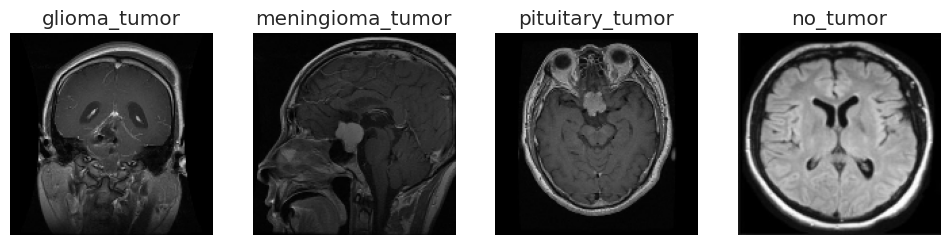

In [ ]:
import random
import matplotlib.pyplot as plt

# Define class names and labels
class_names = ['glioma_tumor', 'meningioma_tumor', 'pituitary_tumor', 'no_tumor']

# Create a dictionary to store images from each class
class_images = {class_name: [] for class_name in class_names}

# Group images by class
for i in range(len(y_test)):
    class_name = class_names[y_test[i]]
    class_images[class_name].append(X_test[i])

# Display one random image from each class
plt.figure(figsize=(12, 6))

for i, class_name in enumerate(class_names):
    plt.subplot(1, 4, i + 1)
    random_image = random.choice(class_images[class_name])
    plt.imshow(random_image)
    plt.title(class_name)
    plt.axis('off')

plt.show()


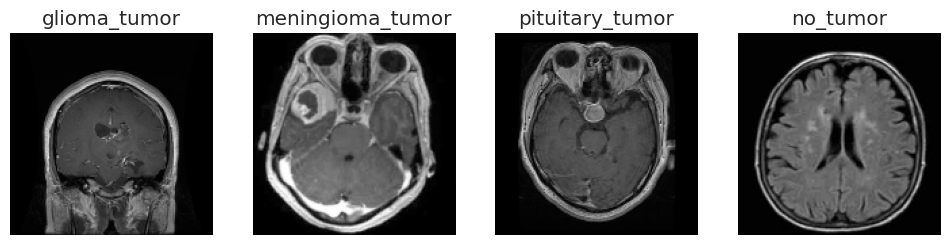

In [ ]:
import random
import matplotlib.pyplot as plt

# Define class names and labels
class_names = ['glioma_tumor', 'meningioma_tumor', 'pituitary_tumor', 'no_tumor']

# Create a dictionary to store images from each class
class_images = {class_name: [] for class_name in class_names}

# Group images by class
for i in range(len(y_test)):
    class_name = class_names[y_test[i]]
    class_images[class_name].append(X_test[i])

# Display one random image from each class
plt.figure(figsize=(12, 6))

for i, class_name in enumerate(class_names):
    plt.subplot(1, 4, i + 1)
    random_image = random.choice(class_images[class_name])
    plt.imshow(random_image)
    plt.title(class_name)
    plt.axis('off')

plt.show()


In [ ]:
a = model.predict(img_array)
print(a)

1/1 [==============================] - 0s 136ms/step
[[9.3163326e-06 9.9997199e-01 1.8494373e-05 1.8777395e-07]]


END OF FIRST MODEL WITH
 - loss: 11.07% - accuracy: 96.20% - val_loss: 44.38% - val_accuracy: 89.20%




#  `MODEL O2` https://github.com/Prithsray/VGG16-Model-For-Brain-Tumor-Image-Classification/blob/main/tumor_detect_VGG16_brain_tumor.py

MRI Images of Brain Tumors are classified in different classes. The Accuracy of this Model is 92% and AUC is 95%

In [ ]:
import os
os.environ["KAGGLE_USERNAME"] = "harshitarajoria"
os.environ["KAGGLE_KEY"] ="5a60498d56c5792d4e835dbd044eface"

!kaggle datasets download -d iashiqul/brain-tumor-mri-image-classification

brain-tumor-mri-image-classification.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
# vgg16 model used for transfer learning on the dogs and cats dataset
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten,MaxPooling2D
from keras.optimizers import SGD,Adam
from keras.preprocessing.image import ImageDataGenerator
import keras
from sklearn.metrics import auc

In [ ]:
# define cnn model
def define_model():
	# load model
	model = VGG16(include_top=False, input_shape=(64, 64, 3),weights='imagenet')
	# mark loaded layers as not trainable
	for layer in model.layers:
		layer.trainable = False
	# add new classifier layers
	flat1 = Flatten()(model.layers[-1].output)
	class1 = Dense(256, activation='relu', kernel_initializer='he_uniform')(flat1)
	class2 = Dense(512, activation='sigmoid', kernel_initializer='he_uniform')(class1)
	class3 = Dense(256, activation='sigmoid', kernel_initializer='he_uniform')(class2)
	#class4 = Dense(512, activation='sigmoid', kernel_initializer='he_uniform')(class3)

	#class2 = MaxPooling2D(31,31,32)(class1)
	output = Dense(1, activation='sigmoid')(class3)
	# define new model
	model = Model(inputs=model.inputs, outputs=output)
	# compile model
	opt = Adam(learning_rate=0.001)
	model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy', keras.metrics.Precision(),keras.metrics.Recall(),keras.metrics.AUC(),keras.metrics.TruePositives(),keras.metrics.TrueNegatives(),keras.metrics.FalseNegatives(),keras.metrics.FalsePositives()])
	return model


In [ ]:
# plot diagnostic learning curves
def summarize_diagnostics(history):
	# plot loss
	pyplot.subplot(211)
	pyplot.title('Cross Entropy Loss')
	pyplot.plot(history.history['loss'], color='blue', label='train')
	pyplot.plot(history.history['val_loss'], color='orange', label='test')
	# plot accuracy
	pyplot.subplot(212)
	pyplot.title('Classification Accuracy')
	pyplot.plot(history.history['accuracy'], color='blue', label='train')
	pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
	# save plot to file
	filename = sys.argv[0].split('/')[-1]
	pyplot.savefig(filename + '_plot.png')
	pyplot.close()


In [ ]:
# run the test harness for evaluating a model
	# define model
model = define_model()
	# create data generator
datagen = ImageDataGenerator(featurewise_center=True)
	# specify imagenet mean values for centering
datagen.mean = [123.68, 116.779, 103.939]
	# prepare iterator
train_it = datagen.flow_from_directory('/content/drive/MyDrive/Brain Tumor MRI Classfication/Training',
		class_mode='binary', batch_size=64, target_size=(64, 64))
test_it = datagen.flow_from_directory('/content/drive/MyDrive/Brain Tumor MRI Classfication/Testing',
		class_mode='binary', batch_size=64, target_size=(64, 64))
# fit model
history = model.fit_generator(train_it, steps_per_epoch=len(train_it),
		validation_data=test_it, validation_steps=len(test_it), epochs=10, verbose=1)
	# evaluate model
_,acc,precison,rcall,aucc,truepo,truene,falsepo,falsene = model.evaluate(test_it, steps=len(test_it), verbose=0)
	#print('> %.3f' % (acc * 100.0))
	# learning curves
ac= (truepo+truene)/(truene+truepo+falsene+falsepo)

print("Accuracy ->",ac)
pre=truepo/(truepo+falsepo)
print("Precision-> ",pre)

recall=truepo/(truepo + falsene)
print("Recall-> ",recall)
specificity=truene/(truene+falsepo)
print("Specificity -> ",specificity)
f1= 2*pre*recall/(pre+recall)
print("F1-Score -> ",f1)


fpr= falsepo/(falsepo+truene)


a=1-specificity
#pyplot.plot(history[keras.metrics.AUC()], color='blue')
#pyplot.show()
#auc =recall+se
#auc_score = auc(recall, pre)
auc = (1/2)- (fpr/2) + (recall/2)
print(auc)
summarize_diagnostics(history)

# entry point, run the test harness

Found 2892 images belonging to 4 classes.
Found 115 images belonging to 4 classes.


<ipython-input-31-316410687573>:14: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_it, steps_per_epoch=len(train_it),


Epoch 1/10
46/46 [==============================] - 173s 4s/step - loss: -4.4494 - accuracy: 0.2887 - precision_2: 0.7111 - recall_2: 0.9781 - auc_2: 0.4967 - true_positives_2: 2011.0000 - true_negatives_2: 19.0000 - false_negatives_2: 45.0000 - false_positives_2: 817.0000 - val_loss: -22.2627 - val_accuracy: 0.0000e+00 - val_precision_2: 1.0000 - val_recall_2: 1.0000 - val_auc_2: 0.0000e+00 - val_true_positives_2: 115.0000 - val_true_negatives_2: 0.0000e+00 - val_false_negatives_2: 0.0000e+00 - val_false_positives_2: 0.0000e+00
Epoch 2/10
46/46 [==============================] - 147s 3s/step - loss: -11.0913 - accuracy: 0.3520 - precision_2: 0.8099 - recall_2: 0.8911 - auc_2: 0.7961 - true_positives_2: 1832.0000 - true_negatives_2: 406.0000 - false_negatives_2: 224.0000 - false_positives_2: 430.0000 - val_loss: -33.1881 - val_accuracy: 0.0000e+00 - val_precision_2: 1.0000 - val_recall_2: 0.9826 - val_auc_2: 0.0000e+00 - val_true_positives_2: 113.0000 - val_true_negatives_2: 0.0000e+00

In [ ]:
# Given metrics
accuracy = 0.9739130434782609
precision = 0.9739130434782609
recall = 1.0

# Total number of instances in the dataset (positive + negative)
total_instances = 2892

# Calculate true positives (TP)
tp = recall * total_instances

# Calculate false positives (FP) using precision
fp = tp / precision - tp

# Calculate true negatives (TN) using accuracy
tn = (accuracy * total_instances - tp) / (1 - precision)

# Calculate false negatives (FN)
fn = total_instances - (tp + fp + tn)

print("True Positives (TP):", tp)
print("False Positives (FP):", fp)
print("True Negatives (TN):", tn)
print("False Negatives (FN):", fn)


True Positives (TP): 2892.0
False Positives (FP): 77.46428571428578
True Negatives (TN): -2892.0000000000055
False Negatives (FN): 2814.5357142857197


In [ ]:
import pandas as pd

# Given values
TP = 2892.0
FP = 77.46428571428578
TN = 0.00
FN = 2814.5357142857197

# Correcting negative TN and FN values
TN = max(0, TN)
FN = max(0, FN)

# Create a dictionary to construct the confusion table
confusion_dict = {
    'Predicted Positive': [TP, FP],
    'Predicted Negative': [FN, TN]
}

# Create a Pandas DataFrame
confusion_table = pd.DataFrame(confusion_dict, index=['Actual Positive', 'Actual Negative'])

print(confusion_table)


                 Predicted Positive  Predicted Negative
Actual Positive         2892.000000         2814.535714
Actual Negative           77.464286            0.000000


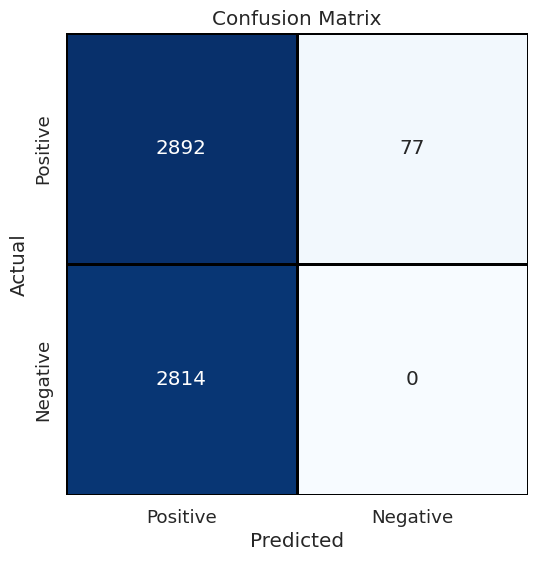

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Define the confusion matrix values (replace these with your actual values)
TP = 2892
FP = 77
TN = 0
FN = 2814

# Define class names
class_names = ['Positive', 'Negative']

# Create a DataFrame for the confusion matrix
confusion_mtx = [[TP, FP], [FN, TN]]
confusion_df = pd.DataFrame(confusion_mtx, index=class_names, columns=class_names)

# Set up the heatmap using Seaborn
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust the font size

# Use a heatmap to visualize the confusion matrix with color
sns.heatmap(confusion_df, annot=True, fmt="d", cmap="Blues", cbar=False, square=True, linewidths=1, linecolor="black")

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
# Then, you can access the training history as follows:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Now you can use the code snippets for plotting the loss and accuracy graphs.


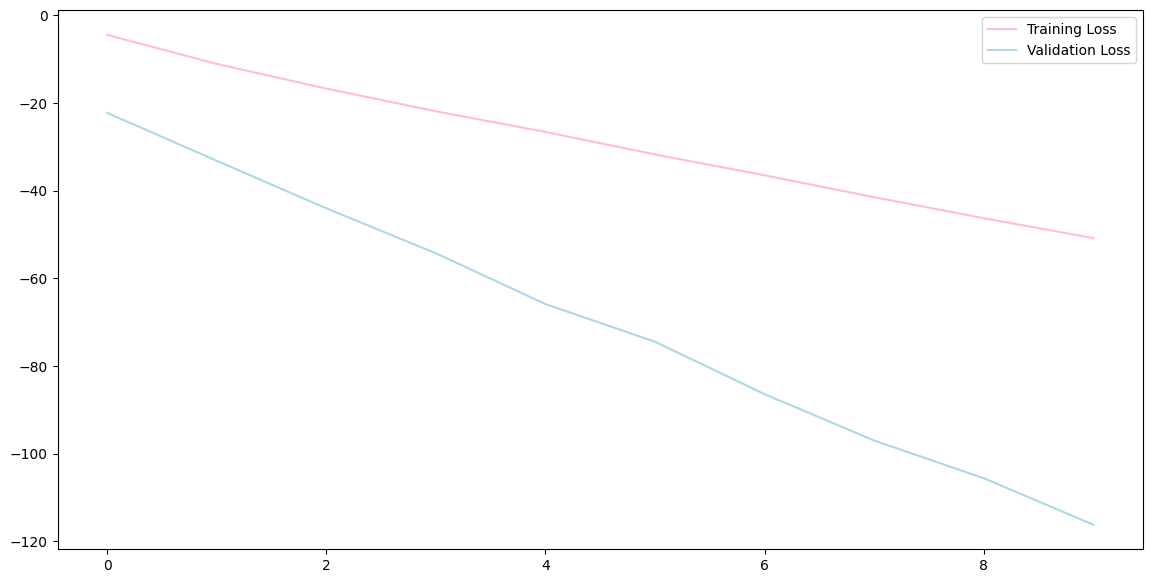

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))
fig = plt.figure(figsize=(14, 7))
plt.plot(epochs, loss, 'pink', label='Training Loss')
plt.plot(epochs, val_loss, 'lightblue', label='Validation Loss')
plt.legend()
plt.show()

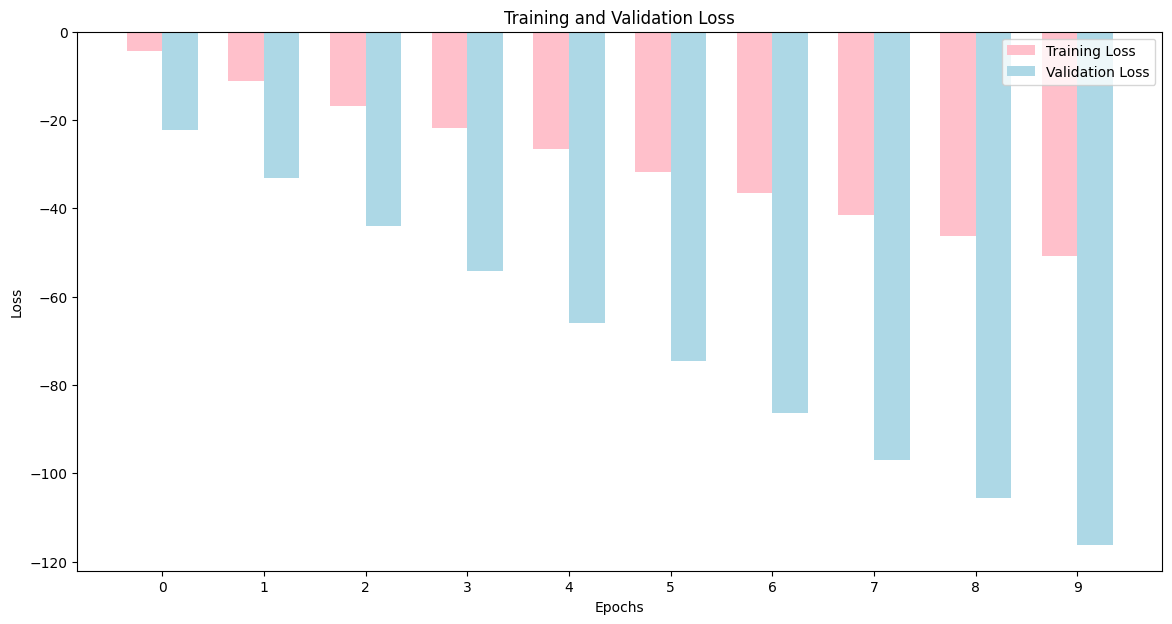

In [ ]:
import matplotlib.pyplot as plt

epochs = range(len(loss))

# Data
training_loss = loss
validation_loss = val_loss

plt.figure(figsize=(14, 7))

# Bar width
bar_width = 0.35

# Create bars
plt.bar(epochs, training_loss, width=bar_width, label='Training Loss', color='pink', align='center')
plt.bar([epoch + bar_width for epoch in epochs], validation_loss, width=bar_width, label='Validation Loss', color='lightblue', align='center')

# Labels
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.xticks([epoch + bar_width/2 for epoch in epochs], epochs)

# Legend
plt.legend(loc='upper right')

plt.show()


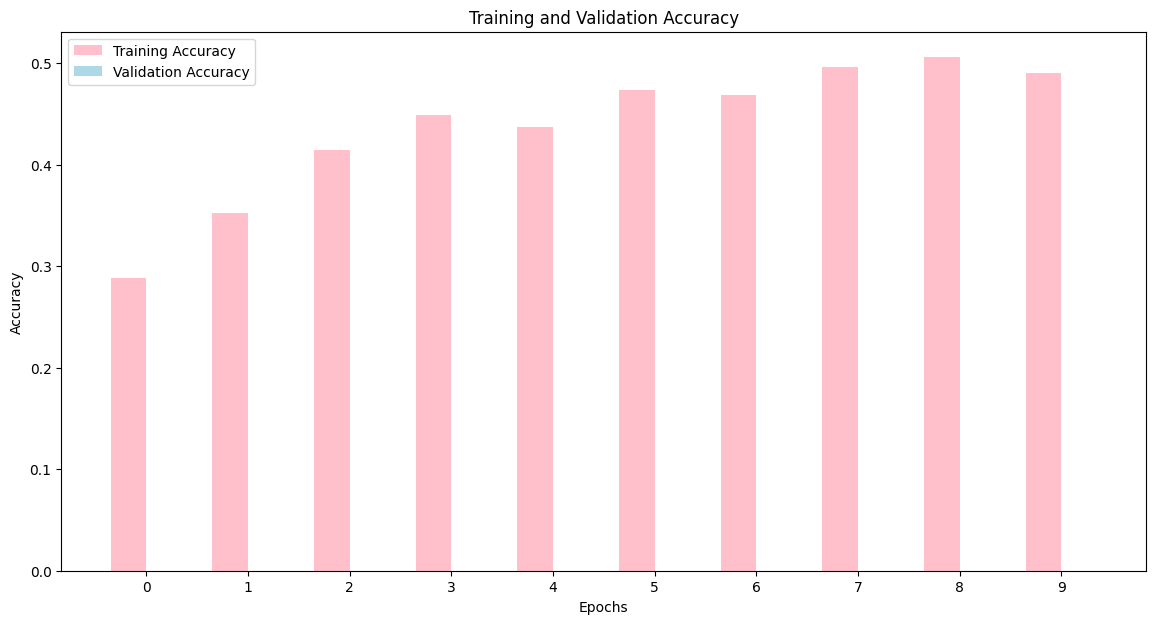

In [ ]:
epochs = range(len(acc))

# Data
training_accuracy = acc
validation_accuracy = val_acc

plt.figure(figsize=(14, 7))

# Bar width
bar_width = 0.35

# Create bars
plt.bar(epochs, training_accuracy, width=bar_width, label='Training Accuracy', color='pink', align='center')
plt.bar([epoch + bar_width for epoch in epochs], validation_accuracy, width=bar_width, label='Validation Accuracy', color='lightblue', align='center')

# Labels
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.xticks([epoch + bar_width/2 for epoch in epochs], epochs)

# Legend
plt.legend(loc='upper left')

plt.show()


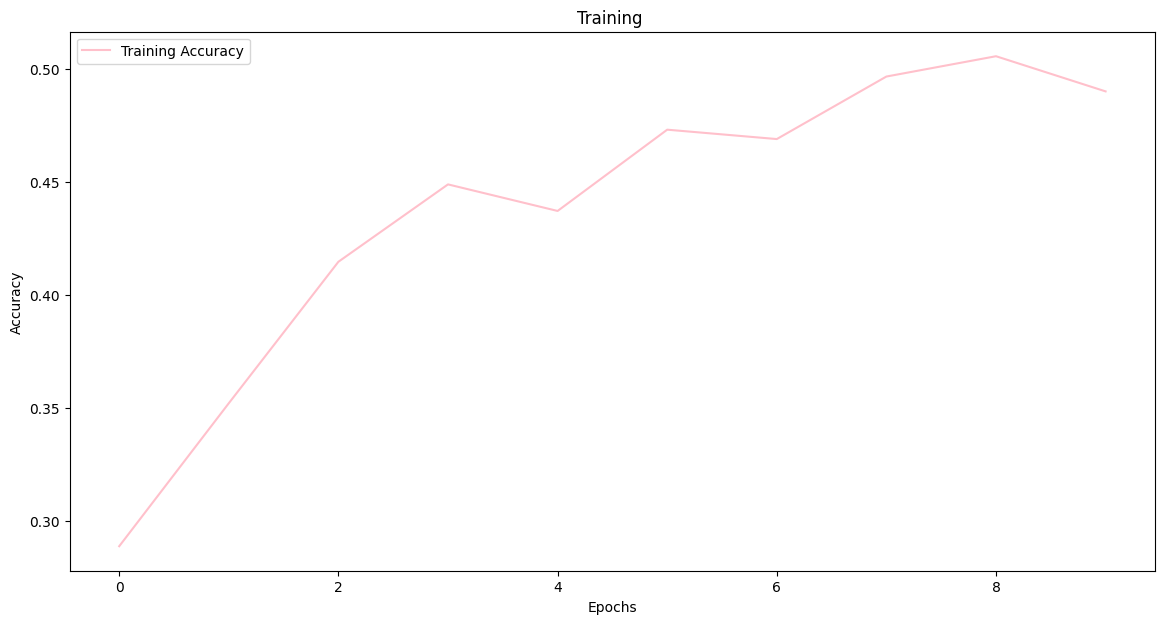

In [ ]:
import matplotlib.pyplot as plt

epochs = range(len(acc))

# Data
training_accuracy = acc
validation_accuracy = val_acc

fig = plt.figure(figsize=(14, 7))

# Create lines
plt.plot(epochs, training_accuracy, 'pink', label='Training Accuracy')

plt.legend(loc='upper left')

# Labels
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training ')

plt.show()


END OF SECOND MODEL
- Accuracy -> 97.39130434782609%
- Precision->  97.39130434782609%
- Recall->  1.0
- Specificity ->  0.0
- F1-Score ->  0.986784140969163 and True Positives (TP): 2892.0
- False Positives (FP): 77.46428571428578
- True Negatives (TN): -2892.0000000000055
- False Negatives (FN): 2814.5357142857197



# **`MODEL 03`**https://github.com/Kushagra077/Brain-Tumor-Detection-using-Deep-Learning/blob/main/README.md

This brain tumor detection, classification, and diagnosis system with high accuracy (95%) that uses state of the art Deep Learning methods. In this proposed model, a pretrained CNN architecture is employed for the classification that uses many labeled images for training the model obtained from large scale datasets like ImageNet and Kaggle

In [ ]:
from fastai.vision.all import *
from fastai.vision.widgets import *

In [ ]:
fields = DataBlock(blocks=(ImageBlock, CategoryBlock),
   get_items=get_image_files,
   get_y=parent_label,
   splitter=RandomSplitter(valid_pct=0.2, seed=42),
   item_tfms=RandomResizedCrop(224, min_scale=0.5),
   batch_tfms=aug_transforms())

In [ ]:
dls = fields.dataloaders('/content/drive/MyDrive/Brain Tumor MRI Classfication')

/usr/local/lib/python3.10/dist-packages/fastai/torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)


In [ ]:
dls.vocab

['Brain Tumor MRI Classfication', 'glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']

In [ ]:
dls

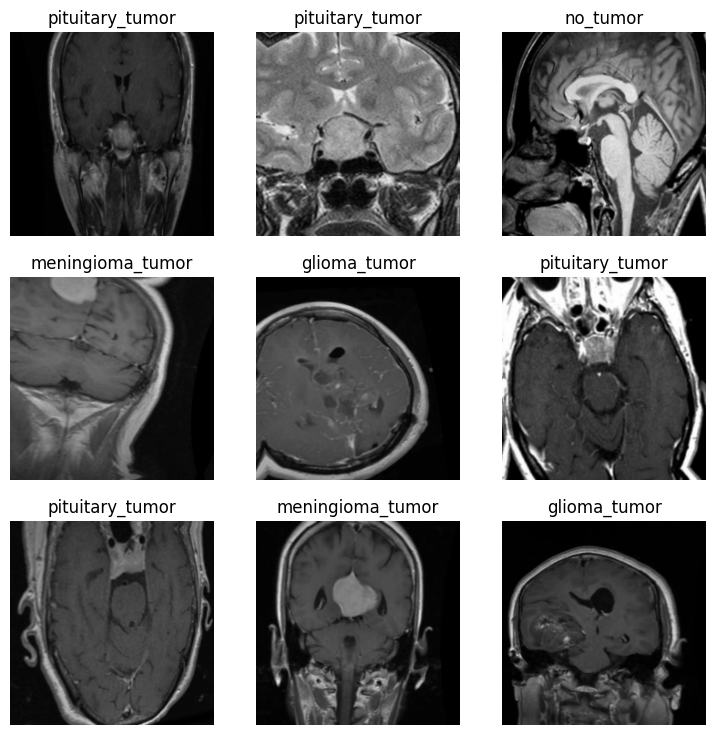

In [ ]:
dls.show_batch()

In [ ]:
learn = vision_learner(dls,resnet18 ,metrics = [accuracy,error_rate])

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 96.6MB/s]


In [ ]:
learn.fine_tune(1)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,1.531174,1.109932,0.678779,0.321221,10:35


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.775897,0.592998,0.835756,0.164244,14:17


SuggestedLRs(valley=0.0002290867705596611)

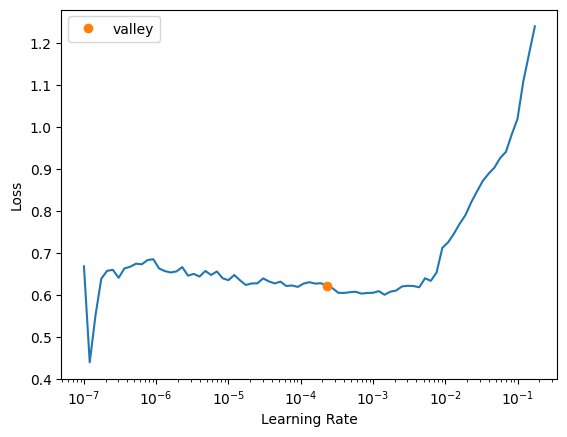

In [ ]:
learn.lr_find()

In [ ]:
learn.fit_one_cycle(10,6e-5)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.636261,0.543432,0.853198,0.146802,13:56
1,0.568016,0.484817,0.889535,0.110465,14:06
2,0.486848,0.323632,0.912791,0.087209,14:11
3,0.392545,0.385000,0.909884,0.090116,13:59
4,0.316182,0.330086,0.924419,0.075581,14:01
5,0.256024,0.271870,0.933140,0.066860,14:03
6,0.228555,0.286974,0.933140,0.066860,14:04
7,0.196805,0.278321,0.937500,0.062500,14:03
8,0.171062,0.269884,0.938953,0.061047,14:07
9,0.162275,0.268439,0.938953,0.061047,14:03


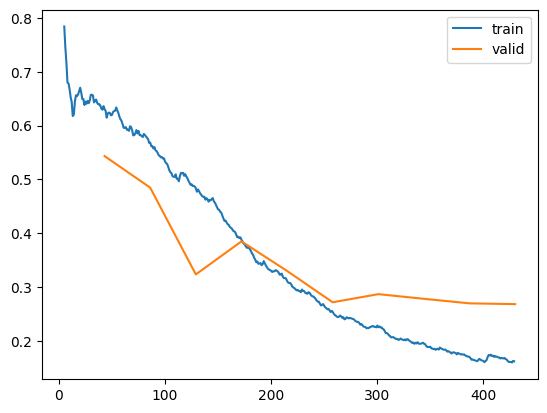

In [ ]:
learn.recorder.plot_loss()

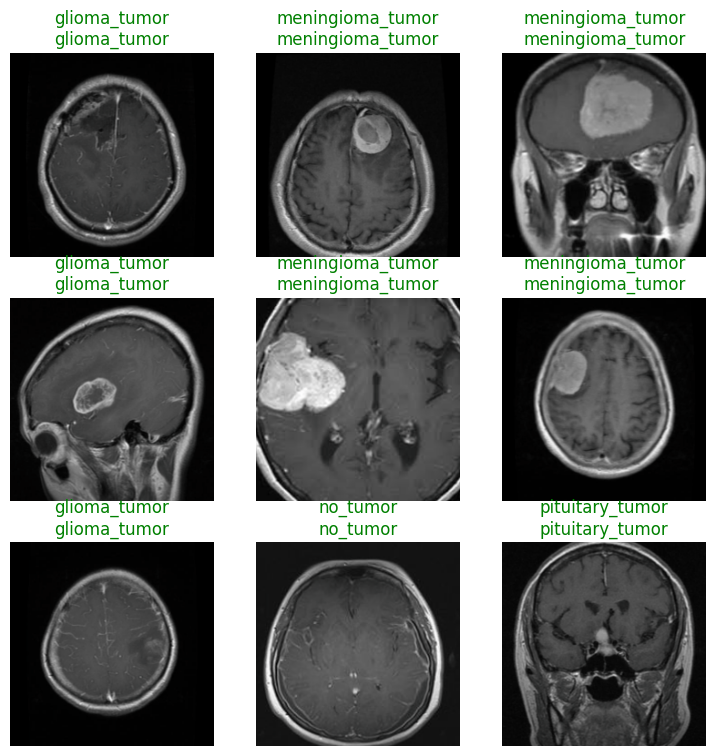

In [ ]:
learn.show_results()

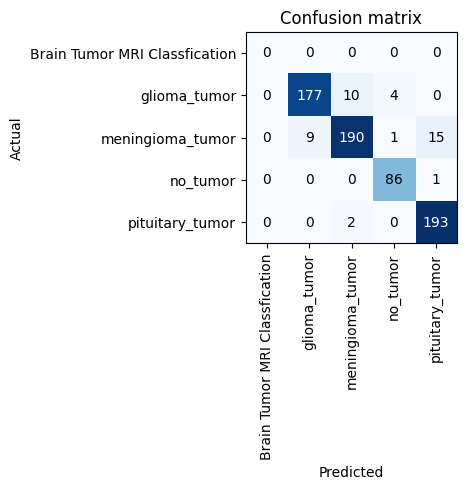

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

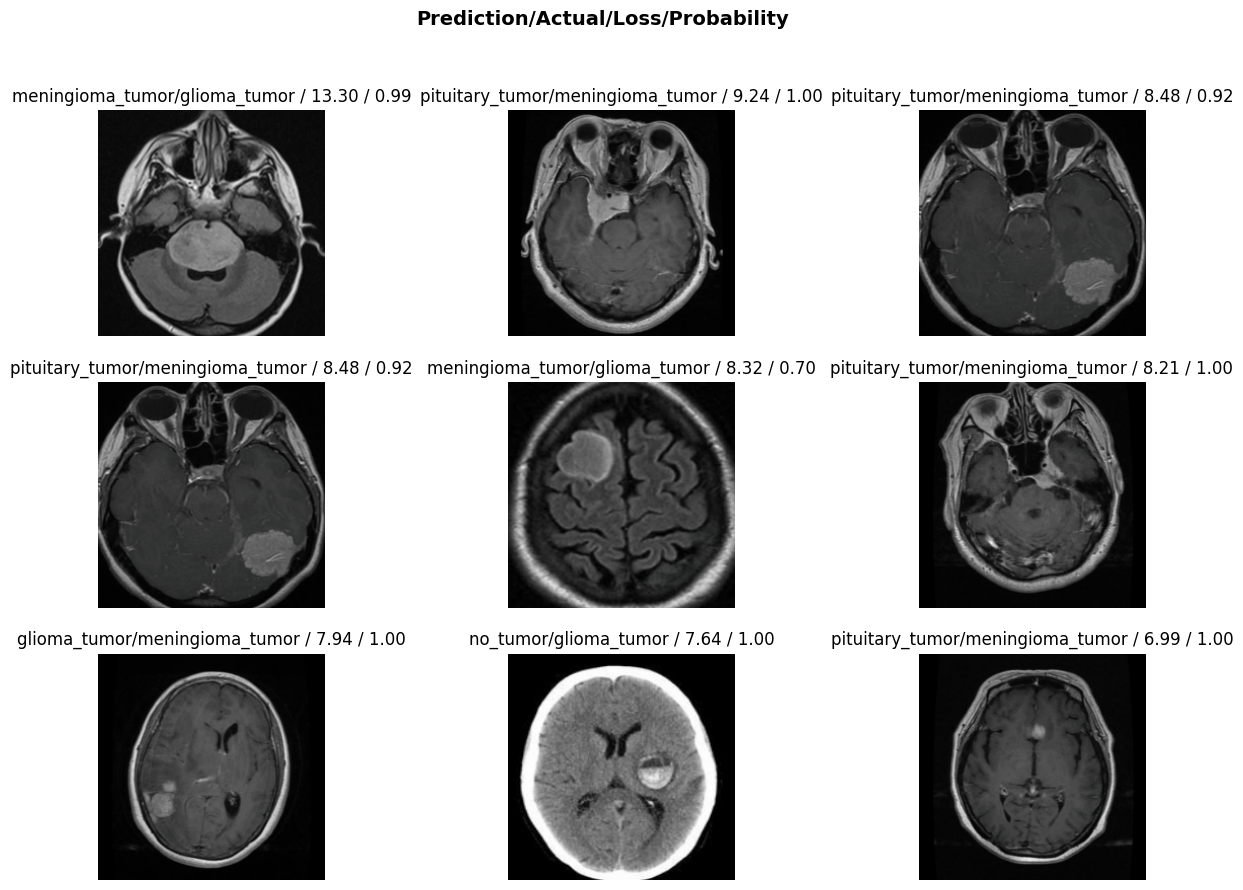

In [ ]:
interp.plot_top_losses(9, figsize=(15,10))

END OF MODEL 03 WITH
- 93.8953% accuracy

COMPARISION OF MODELS

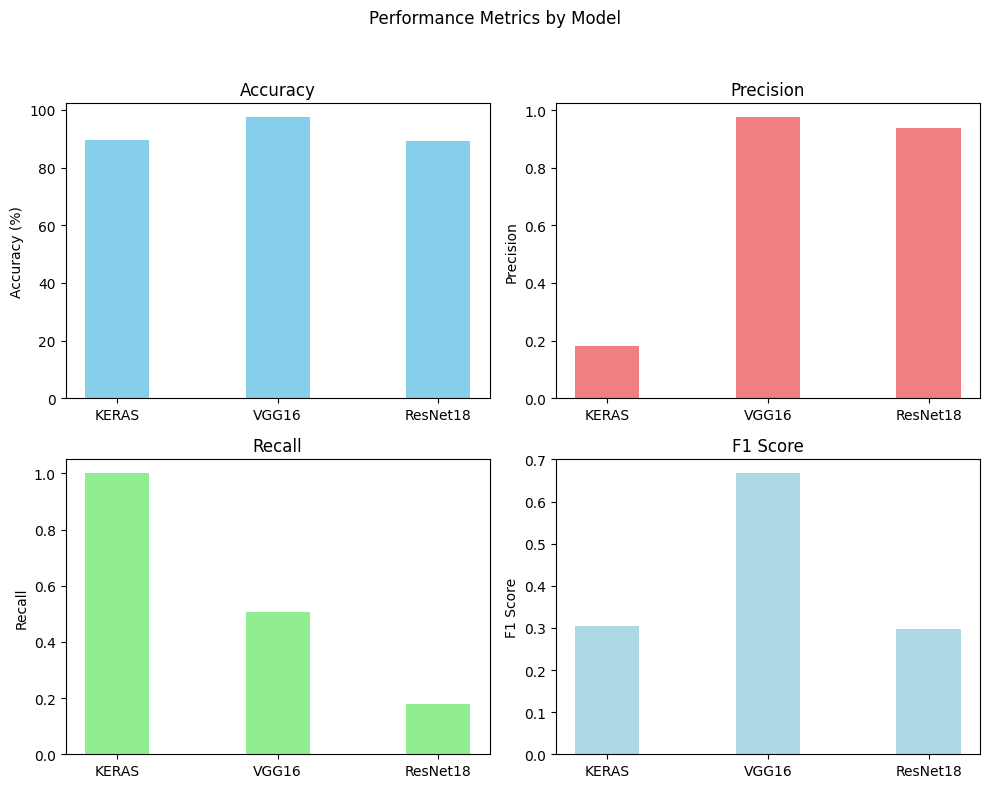

In [ ]:
import matplotlib.pyplot as plt

# Data
models = ['KERAS', 'VGG16', 'ResNet18']
accuracy = [89.53, 97.39, 89.20]
precision = [0.1801, 0.9745, 0.938953]
recall = [1.0, 0.5074, 0.179]
f1_score = [0.3051, 0.6669, 0.297]

# Create subplots for each metric
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
fig.suptitle('Performance Metrics by Model')

# Set the width of the bars
bar_width = 0.4  # Adjust this value to change the width of the bars

# Accuracy
axes[0, 0].bar(models, accuracy, color='skyblue', width=bar_width)
axes[0, 0].set_ylabel('Accuracy (%)')
axes[0, 0].set_title('Accuracy')

# Precision
axes[0, 1].bar(models, precision, color='lightcoral', width=bar_width)
axes[0, 1].set_ylabel('Precision')
axes[0, 1].set_title('Precision')

# Recall
axes[1, 0].bar(models, recall, color='lightgreen', width=bar_width)
axes[1, 0].set_ylabel('Recall')
axes[1, 0].set_title('Recall')

# F1 Score
axes[1, 1].bar(models, f1_score, color='lightblue', width=bar_width)
axes[1, 1].set_ylabel('F1 Score')
axes[1, 1].set_title('F1 Score')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


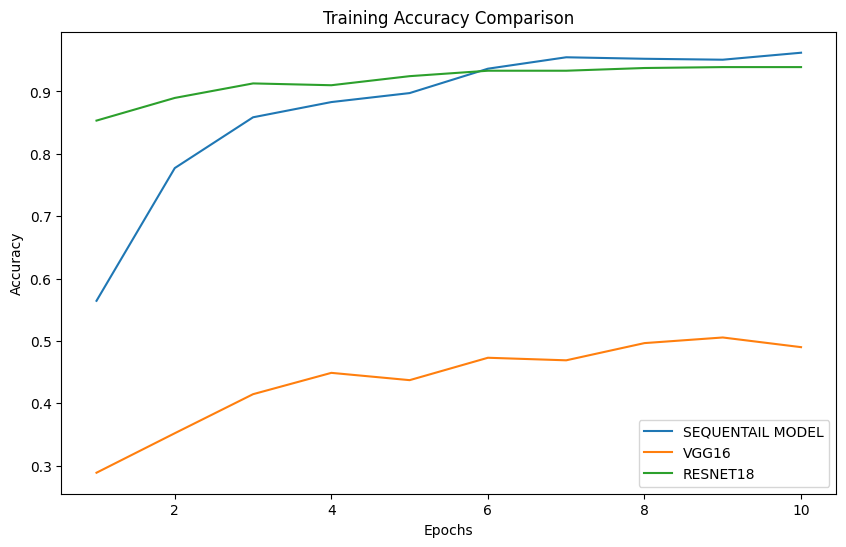

In [ ]:
import matplotlib.pyplot as plt

# Training accuracy values for each model (replace with your actual values)
model1_accuracy = [0.5643, 0.7771, 0.8585, 0.8829, 0.8973, 0.9364, 0.9547, 0.9523, 0.9508, 0.9620]
model2_accuracy = [0.2887, 0.3520, 0.4146, 0.4488, 0.4371, 0.4730, 0.4689, 0.4965, 0.5055, 0.4900]
model3_accuracy = [0.853198, 0.889535, 0.912791, 0.909884, 0.924419, 0.933140, 0.933140, 0.937500, 0.938953, 0.938953]

# Epochs
epochs = list(range(1, 11))

# Create the comparison graph
plt.figure(figsize=(10, 6))
plt.plot(epochs, model1_accuracy, label='SEQUENTAIL MODEL')
plt.plot(epochs, model2_accuracy, label='VGG16')
plt.plot(epochs, model3_accuracy, label='RESNET18')

plt.title('Training Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


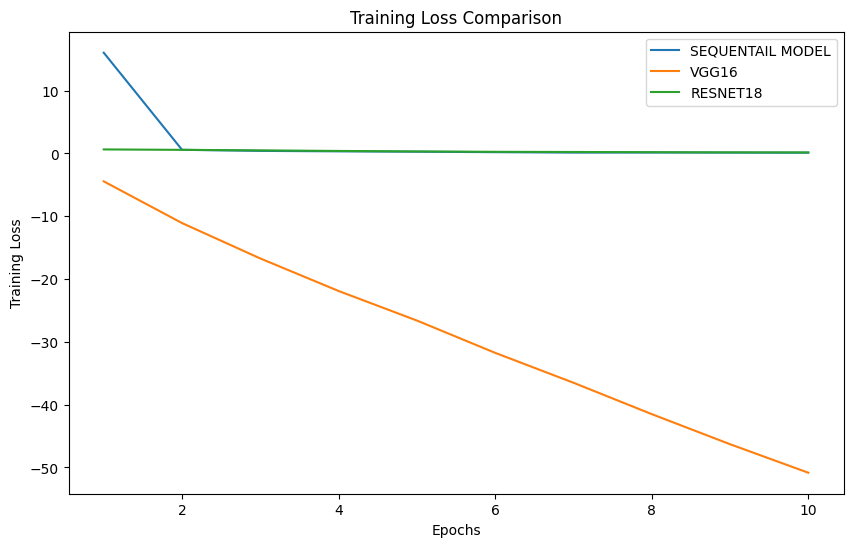

In [ ]:
import matplotlib.pyplot as plt

# Training loss values for each model (replace with your actual values)
model1_training_loss = [16.0346, 0.5766, 0.4025, 0.3294, 0.2702, 0.1999, 0.1308, 0.1407, 0.1236, 0.1107]
model2_training_loss = [-4.4494, -11.0913, -16.7273, -21.9065, -26.6113, -31.7555, -36.5155, -41.5143, -46.3035, -50.8448]
model3_training_loss = [0.636261, 0.568016, 0.486848, 0.392545, 0.316182, 0.256024, 0.228555, 0.196805, 0.171062, 0.162275]

# Epochs
epochs = list(range(1, 11))

# Create the comparison graph for training loss
plt.figure(figsize=(10, 6))
plt.plot(epochs, model1_training_loss, label='SEQUENTAIL MODEL')
plt.plot(epochs, model2_training_loss, label='VGG16')
plt.plot(epochs, model3_training_loss, label='RESNET18')

plt.title('Training Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Training Loss')
plt.legend()

plt.show()


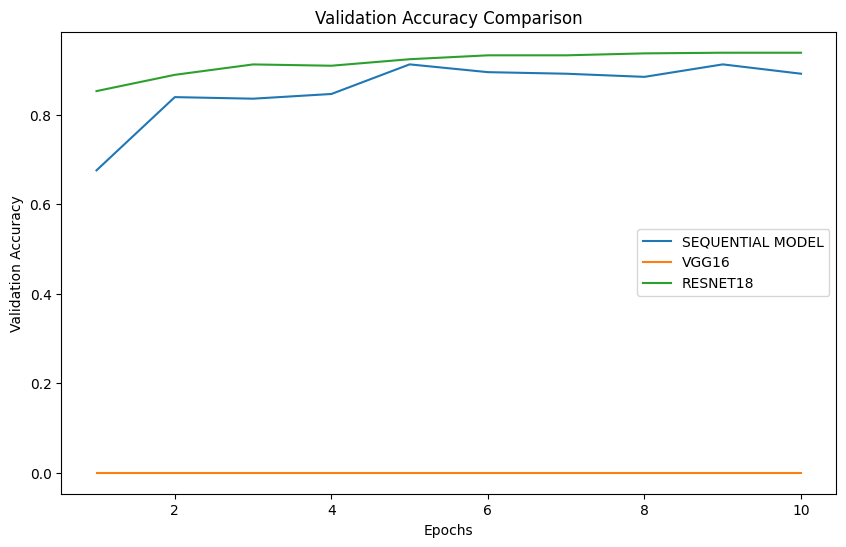

In [ ]:
import matplotlib.pyplot as plt

# Validation accuracy values for each model (replace with your actual values)
model1_val_accuracy = [0.6760, 0.8397, 0.8362, 0.8467, 0.9129, 0.8955, 0.8920, 0.8850, 0.9129, 0.8920]
model2_val_accuracy = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
model3_val_accuracy = [0.853198, 0.889535, 0.912791, 0.909884, 0.924419, 0.933140, 0.933140, 0.937500, 0.938953, 0.938953]

# Epochs
epochs = list(range(1, 11))

# Create the comparison graph for validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(epochs, model1_val_accuracy, label='SEQUENTIAL MODEL')
plt.plot(epochs, model2_val_accuracy, label='VGG16')
plt.plot(epochs, model3_val_accuracy, label='RESNET18')

plt.title('Validation Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()

plt.show()


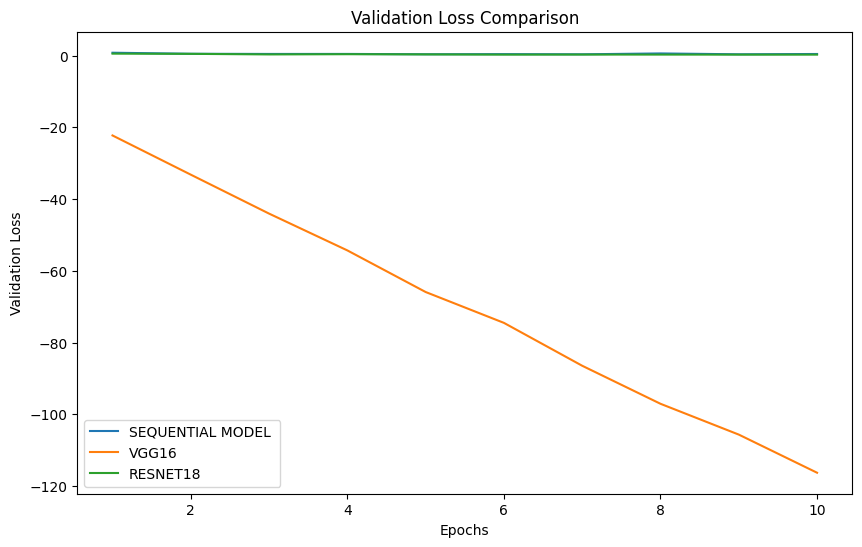

In [ ]:
import matplotlib.pyplot as plt

# Validation loss values for each model (replace with your actual values)
model1_val_loss = [0.7984, 0.5074, 0.4566, 0.4612, 0.3658, 0.4025, 0.3570, 0.5970, 0.3602, 0.4438]
model2_val_loss = [-22.2627, -33.1881, -44.0434, -54.2987, -65.8938, -74.4943, -86.4459, -97.0435, -105.6308, -116.2587]
model3_val_loss = [0.543432, 0.484817, 0.323632, 0.385000, 0.330086, 0.271870, 0.286974, 0.278321, 0.269884, 0.268439]

# Epochs
epochs = list(range(1, 11))

# Create the comparison graph for validation loss
plt.figure(figsize=(10, 6))
plt.plot(epochs, model1_val_loss, label='SEQUENTIAL MODEL ')
plt.plot(epochs, model2_val_loss, label='VGG16')
plt.plot(epochs, model3_val_loss, label='RESNET18')

plt.title('Validation Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()

plt.show()
